In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1. EDA

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


### Input

- N - ratio of Nitrogen (NH4+) content in soil
- P - ratio of Phosphorous (P) content in soil
- K - ratio of Potassium (K) content in soil
- ph - soil acidity (pH)
- ec - electrical conductivity
- oc - organic carbon
- S - sulfur (S)
- zn - Zinc (Zn)
- fe - Iron (Fe)
- cu - Copper (Cu)
- Mn - Manganese (Mn)
- B - Boron (B)
### Output

- Class fertility (0 "Less Fertile", 1 "Fertile", 2 "Highly Fertile")

In [5]:
df.isnull().sum()

N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64

In [6]:
df.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


<Axes: xlabel='count', ylabel='Output'>

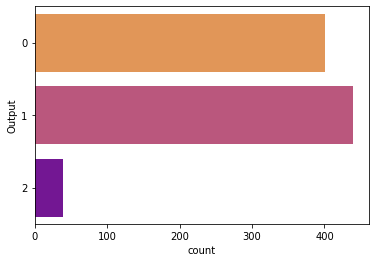

In [7]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Output',data=df,palette="plasma_r")

In [8]:
df['Output'].value_counts()

1    440
0    401
2     39
Name: Output, dtype: int64

In [9]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Output'])

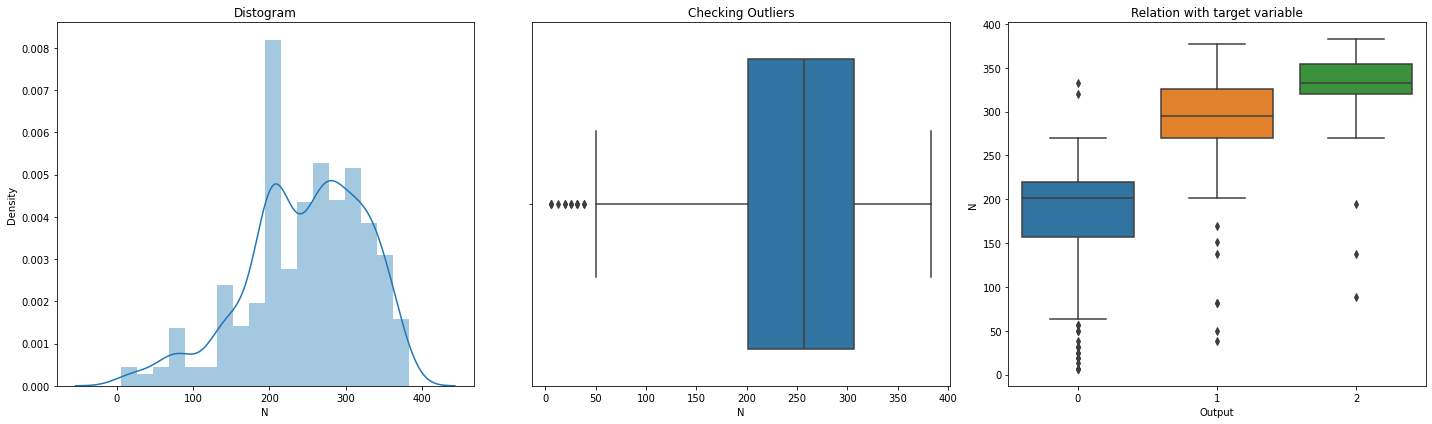

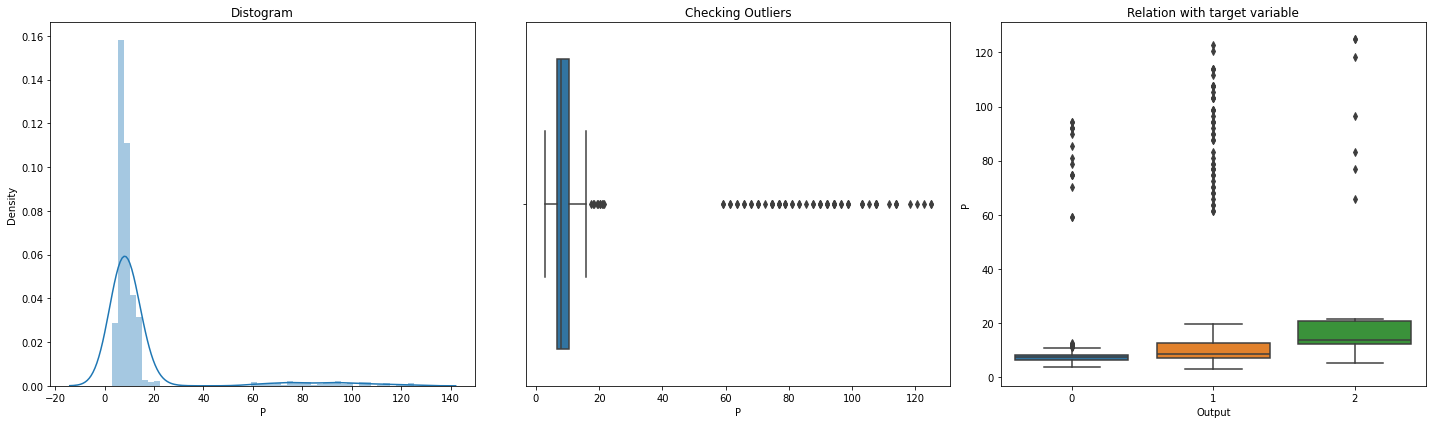

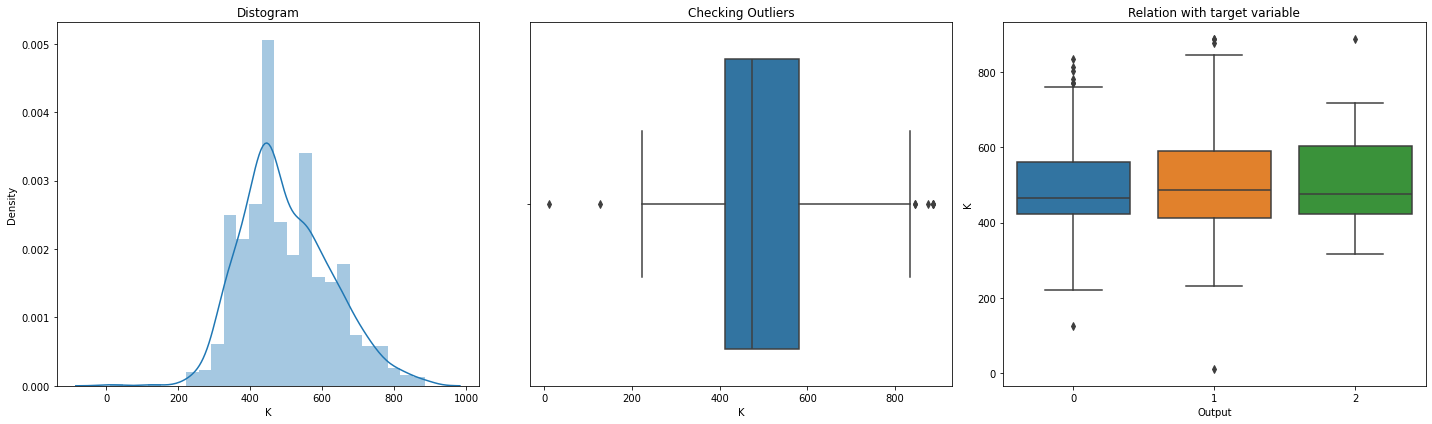

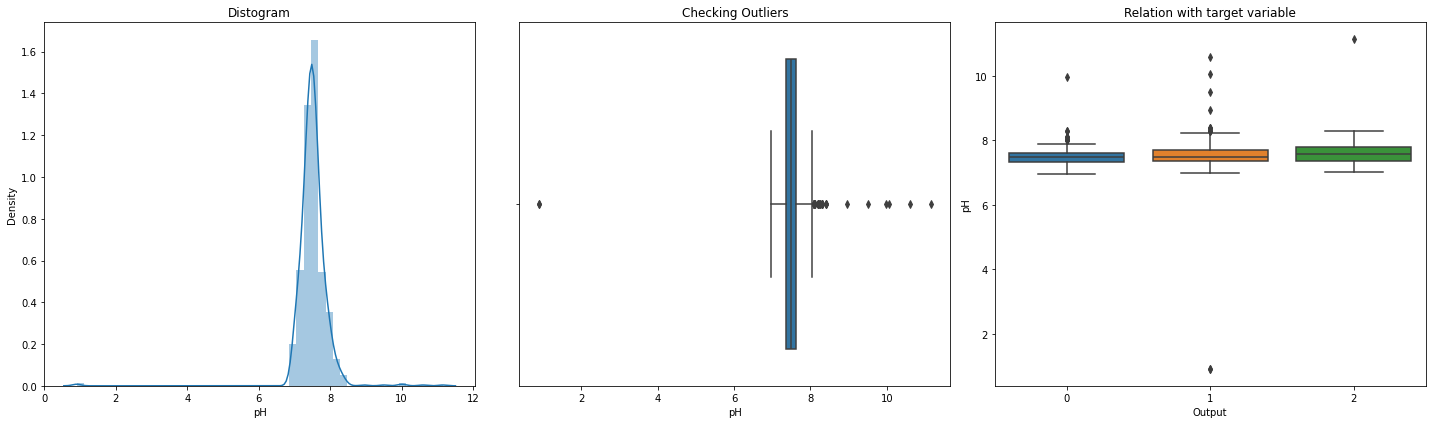

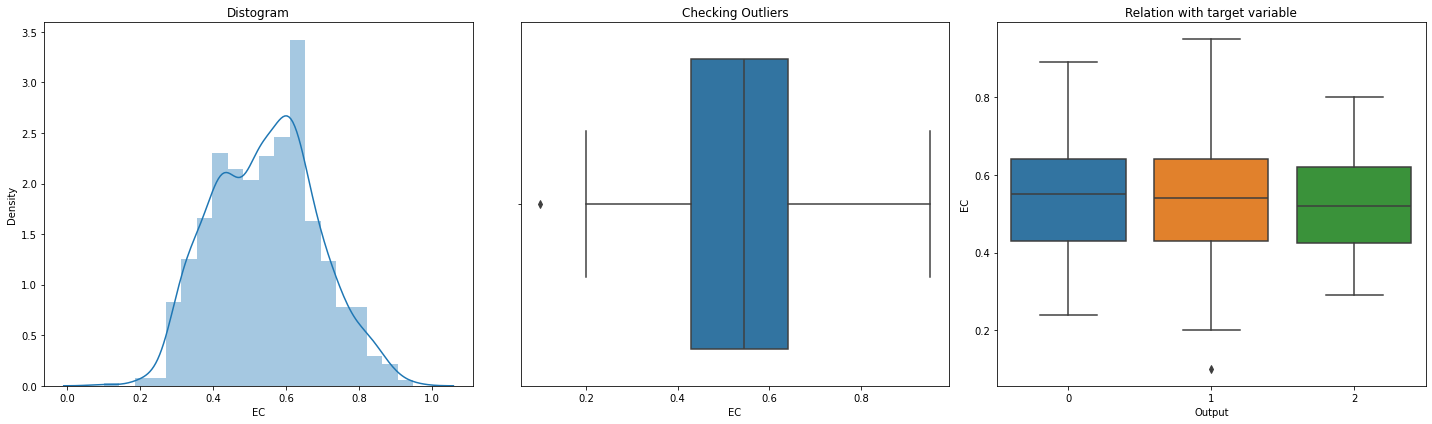

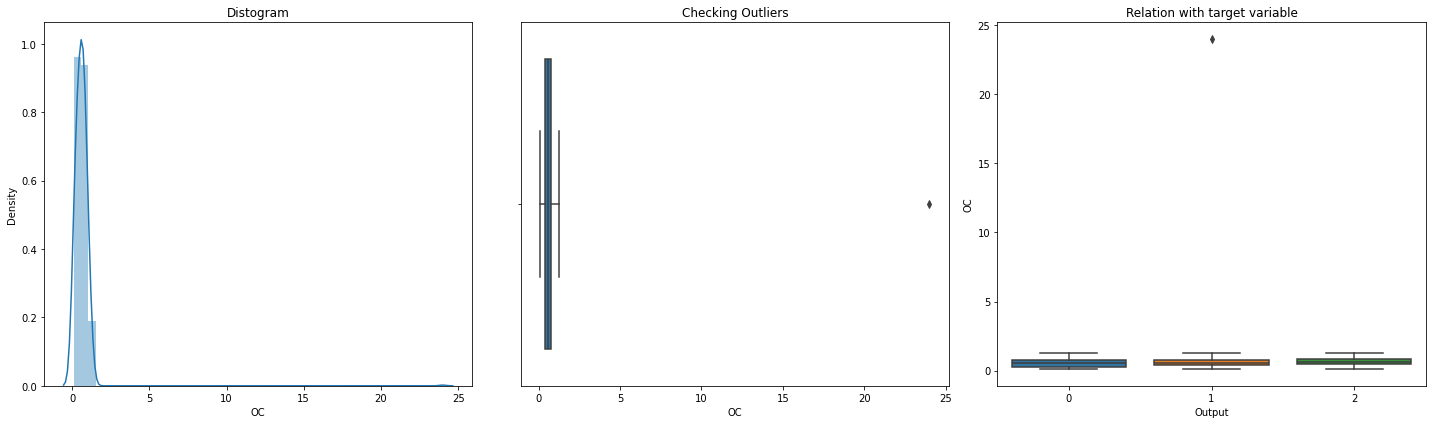

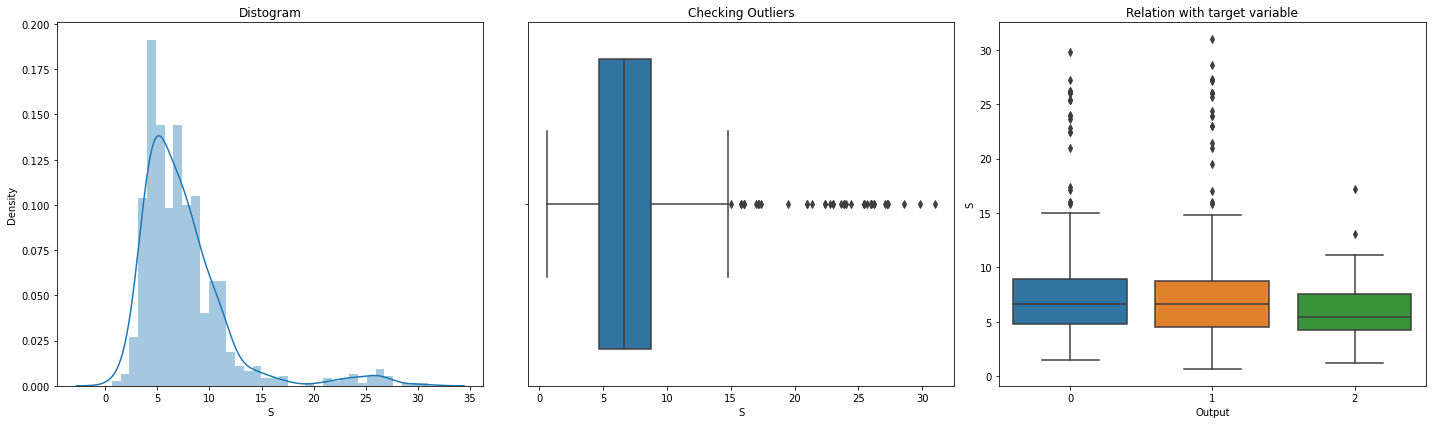

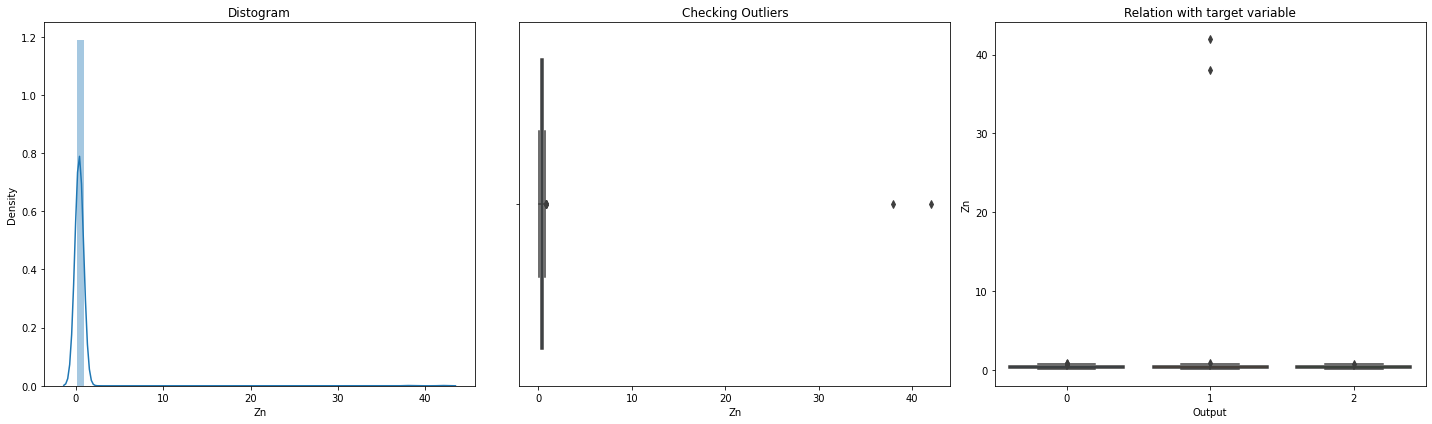

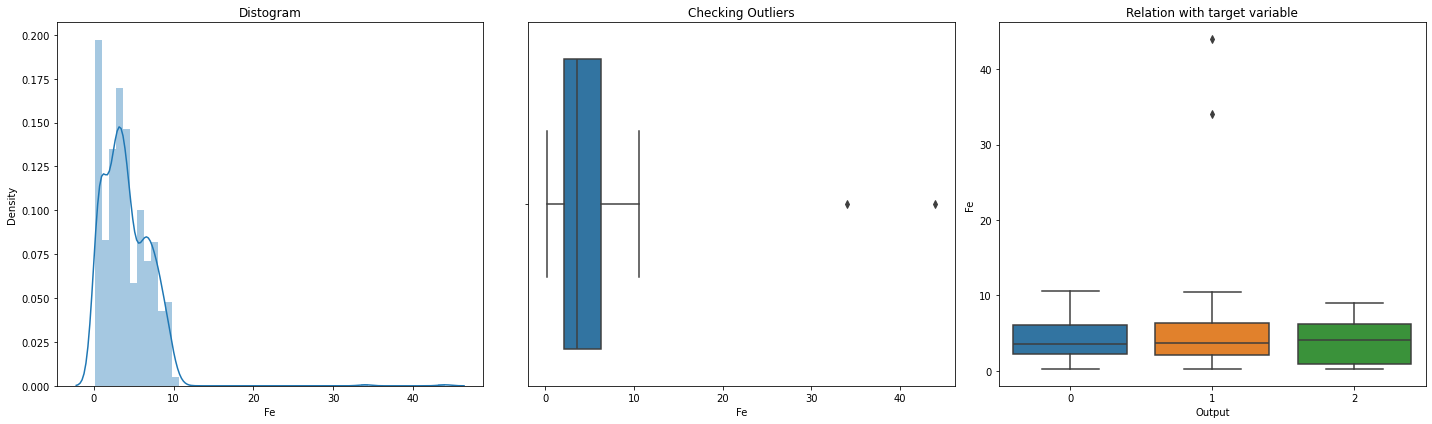

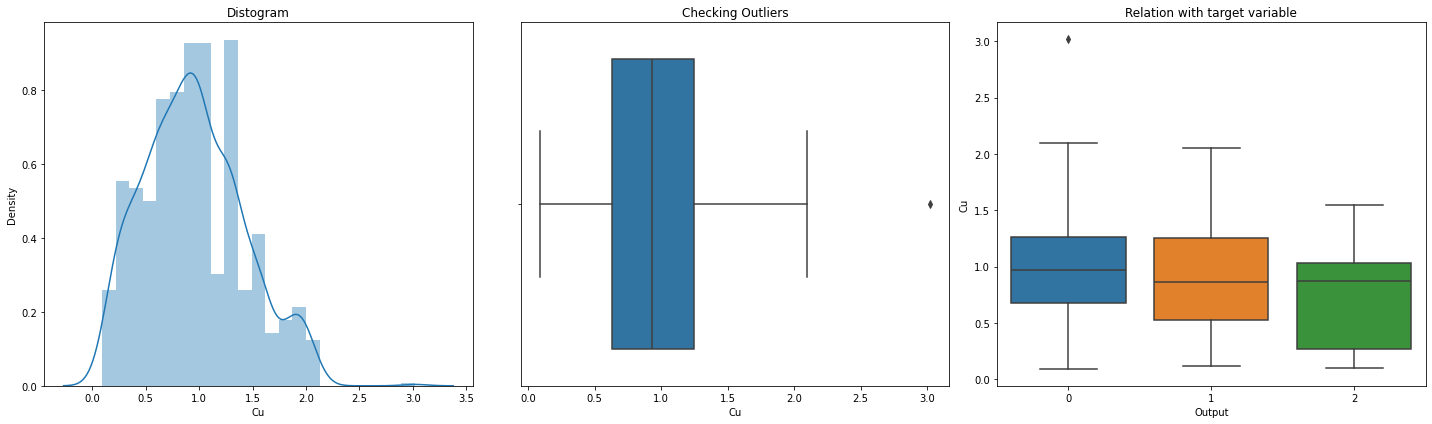

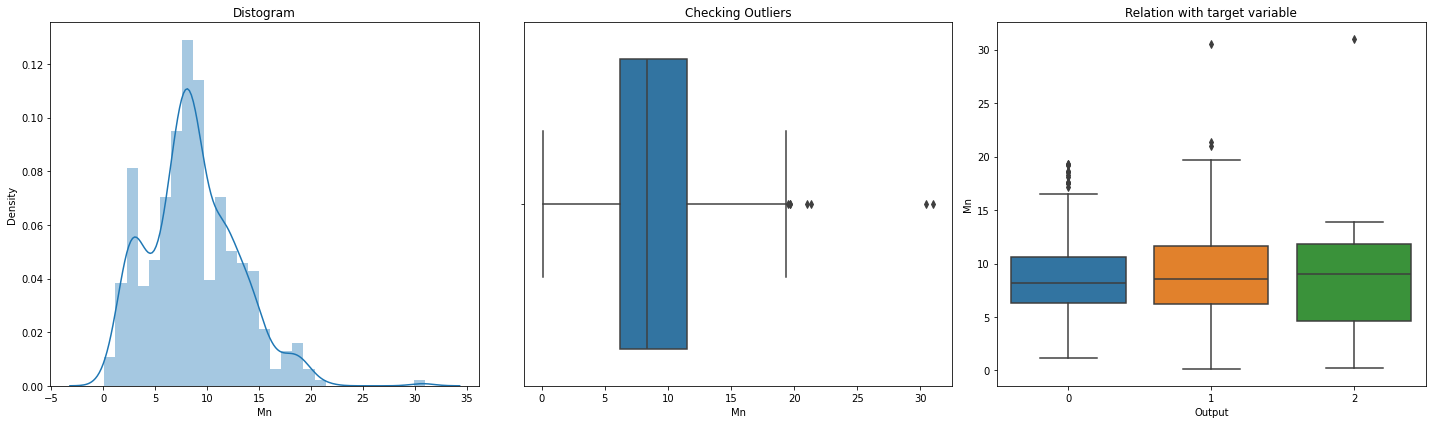

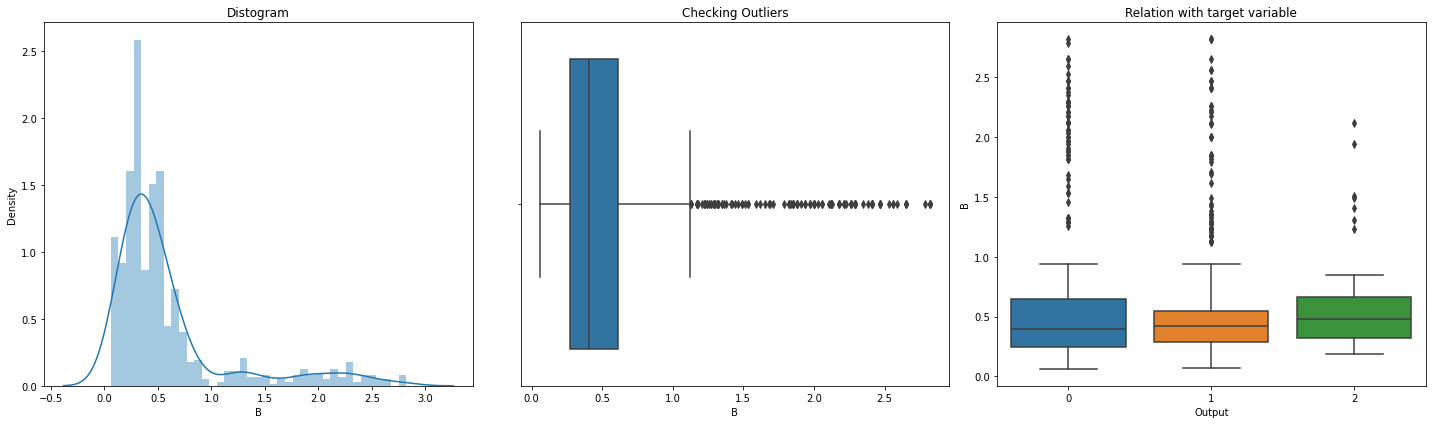

In [10]:
# Create box plots for each numerical variable
for i, column in enumerate(df.columns[:-1]):
    plot_conti(df[column])
plt.tight_layout()
plt.show();

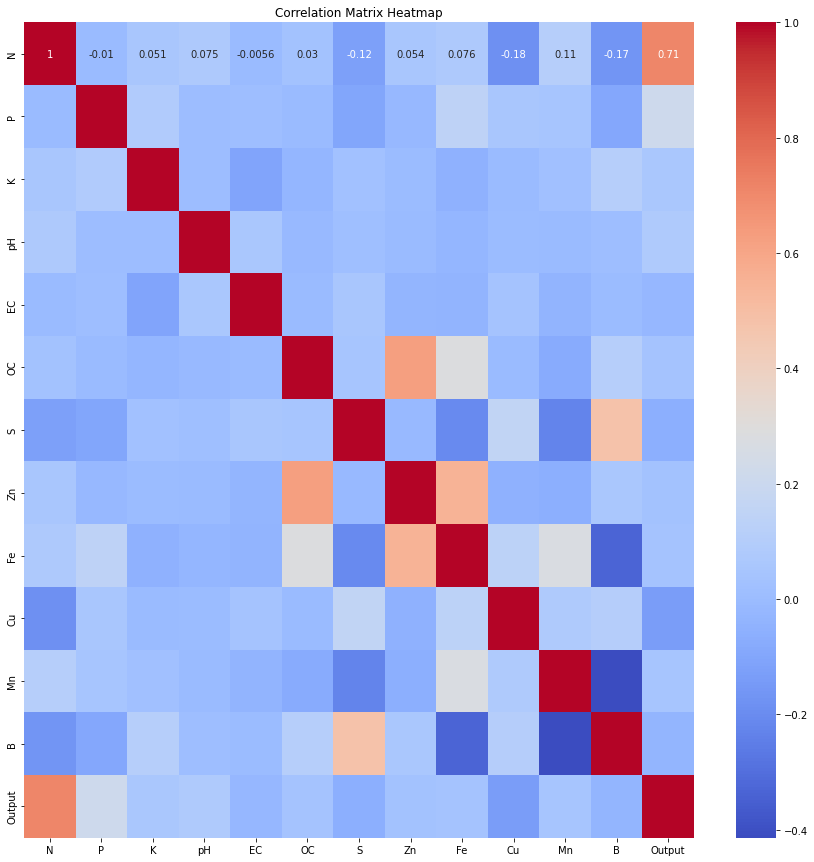

In [11]:
# Create a correlation matrix heatmap
plt.figure(figsize=(15,15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

As we can see 'N' has a highest corr with 'Output'. At this point I don't that we should use only 'N' feature or use all the rest to fit the model. Therefore, u guys can try to them.

### 2. Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [13]:
# Split the data into features (X) and target (y)
X = df.drop('Output', axis=1)
y = df['Output']

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Model Fitting

#### a. Random Forest Classifier

In [15]:
# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [18]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        78
           1       0.87      0.91      0.89        88
           2       0.00      0.00      0.00        10

    accuracy                           0.89       176
   macro avg       0.59      0.63      0.61       176
weighted avg       0.84      0.89      0.86       176



#### b. SVM

In [19]:
from sklearn import svm

In [20]:
# Train a SVM classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [22]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        78
           1       0.82      0.88      0.85        88
           2       0.00      0.00      0.00        10

    accuracy                           0.84       176
   macro avg       0.56      0.60      0.58       176
weighted avg       0.79      0.84      0.82       176



#### c. Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Train a Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [25]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [26]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        78
           1       0.85      0.85      0.85        88
           2       0.50      0.10      0.17        10

    accuracy                           0.85       176
   macro avg       0.74      0.63      0.64       176
weighted avg       0.84      0.85      0.84       176



In [27]:
pd.DataFrame({
    'Model': ['RandomForestClassifier', 'SVM', 'GradientBoostingClassifier'],
    'Accuracy': [89,84,85]
})


,Model,Accuracy
0,RandomForestClassifier,89
1,SVM,84
2,GradientBoostingClassifier,85
